<a href="https://colab.research.google.com/github/Texmo100/MNIST_Classification_DeepLearning_Python/blob/main/MNIST_Classification_DeepLearning_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification Problem 🔢 ✋
---

#### Step 0: Understand the problem and determine if it is require to use a Deep Learning model to solve it

The MNIST dataset consists of **60,000** 28x28 grayscale images of the 10 digits, along with a test set of **10,000** images. The problem at hand is about to classify the 10 categories using a Deep Learning Neural Network.

#### Step 1: Collect and gather the data
---

In [1]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Step 2: Clean data and perform feature engineering (if neccesary)

---


In [2]:
# We should know what is the initial type of the dataset
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

# Analize the data
print(x_train[0])
print(x_train[0].dtype)

print(y_train[0])


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  

#### Step 3: Prepare the data (Data normalization)

The MNIST is already splitted into two sets, training and test. However, we should make another split to get the valdiation set, which will help us to train more effectively the model and get better predictions during the predictions section (Inference). Additionally, we identified in the previous step that our datasets are sets of uint8, so we should convert this into float32 for better data manipulation. Data normalization will be part of this process too.

Another thing we should consider in this step is how to handle the labels, which in this case we can opt to handle it as a simple numerical value (0 - 10), and by choosing the sparse categorical crossentropy as the loss function. However, if we opt to handle the labels as one-hot encoded values, we will need to choose the categorical crossentropy as the loss function.

---

In [3]:
import numpy as np

# Normalizing our training dataset
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype(np.float32) / 255

# Normalizing our test dataset
x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype(np.float32) / 255

# Splitting our validation data set
validation_samples = 10000

partial_x_train = x_train[validation_samples:]
partial_y_train = y_train[validation_samples:]

x_val = x_train[:validation_samples]
y_val = y_train[:validation_samples]


#### Step 4: Build the model

Based on the complexity of the problem, we will be using the Sequential API to build our model.

---


In [4]:
import tensorflow as tf
import keras
from keras import layers


model = keras.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [5]:
model.build(input_shape=(None, 784, ))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Step 5: Compile the model

---

In [6]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

#### Step 6: Train the model

---

In [7]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=128
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8370 - loss: 0.5802 - val_accuracy: 0.9427 - val_loss: 0.1968
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9544 - loss: 0.1558 - val_accuracy: 0.9624 - val_loss: 0.1256
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9684 - loss: 0.1033 - val_accuracy: 0.9680 - val_loss: 0.1068
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9754 - loss: 0.0796 - val_accuracy: 0.9689 - val_loss: 0.0998
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9811 - loss: 0.0596 - val_accuracy: 0.9713 - val_loss: 0.0931
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9843 - loss: 0.0488 - val_accuracy: 0.9737 - val_loss: 0.0876
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9881 - loss: 0.0401 - val_accuracy: 0.9733 - val_loss: 0.0897
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9902 - loss: 0.0321 - val_accuracy: 0.

#### Step 7: Adjust the model (Fighting overfitting)

---

In [8]:
# Extracting the loss and accuracy from the history object
history_dict = history.history

accuracy = history_dict['accuracy']
loss = history_dict['loss']

val_accuracy = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)


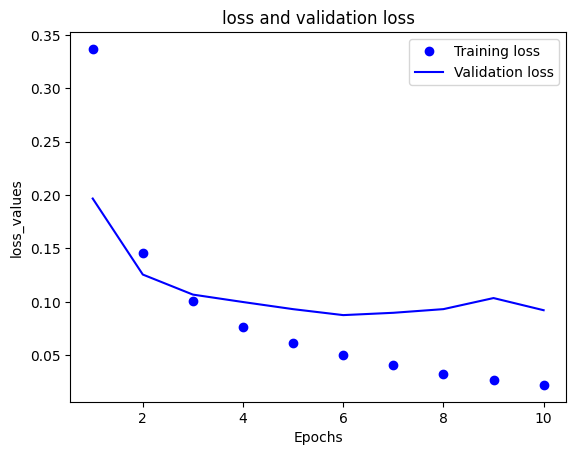

In [9]:
import matplotlib.pyplot as plt

plt.clf()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')

plt.title('loss and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss_values')
plt.legend()
plt.show()


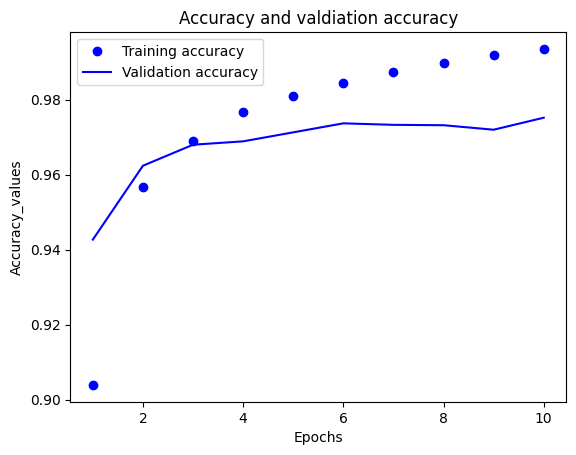

In [10]:
plt.clf()

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')

plt.title('Accuracy and valdiation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy_values')
plt.legend()
plt.show()


#### Step 8: Make predictions with the trained model

---

In [11]:
mini_test = x_test[0:10]
predictions = model.predict(mini_test)

target_datapoint = 0

print(f'The model predicted that is: {predictions[target_datapoint].argmax()}')
print(f'The target value is: {y_test[target_datapoint]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
The model predicted that is: 7
The target value is: 7


In [12]:
(test_loss, test_accuracy) = model.evaluate(x_test, y_test)

print(f'Final accuracy: {test_accuracy}')
print(f'Final loss: {test_loss}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0880
Final accuracy: 0.9782000184059143
Final loss: 0.07696693390607834
